# dataset preparation

In [1]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# Discribe chart

In [3]:
sns.__version__

'0.10.0'

# Histogram

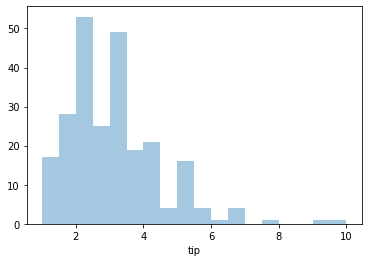

In [4]:
sns.distplot(df['tip'], kde=False)

# Bar chart

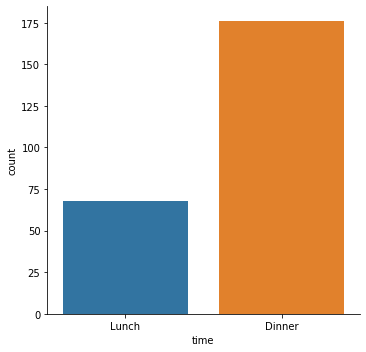

In [5]:
sns.catplot(x = 'time', data=df, kind='count')

# Mean

## Feature
#### ①　A difference between mean and each value is **Deviation**, its sum is 0.
#### 平均値と各値の差を**偏差**といい、合計すると０になる
#### ②　A sum of deviation squres is **sum of squares**, the most smallest sum of squares is difference between mean and each values.
#### 偏差の二乗の合計を**平方和**といい、この平方和は平均値から各値までのものが最も最小となる

##### 偏差平方和と残差平方和について

In [6]:
np.mean(df['tip'])

2.9982786885245902

In [7]:
df['tip'].mean()

2.9982786885245902

In [8]:
# The mean of each gender
df.groupby('sex').mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [9]:
# The mean of tip_rate in each gender
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

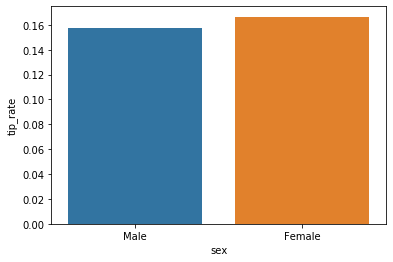

In [10]:
# plot by seaborn
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

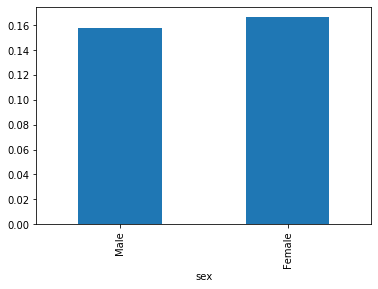

In [11]:
# plot by series
df.groupby('sex').mean()['tip_rate'].plot(kind="bar")

# Median

#### ① A senter value in some values
#### ② This value isn't influenced outliers that much(outlier:外れ値)
#### ③ A calculation of median takes time than one of mean.(Because of sort of values need)

In [12]:
np.median(df['tip_rate'])

0.15476977125802577

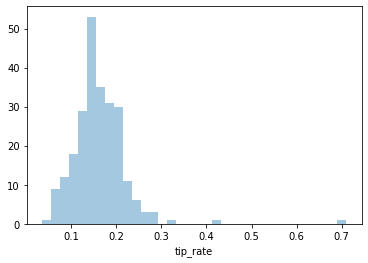

In [13]:
# see histogram of tip_rate
sns.distplot(df['tip_rate'], kde=False)

In [14]:
df['tip_rate'].median()

0.15476977125802577

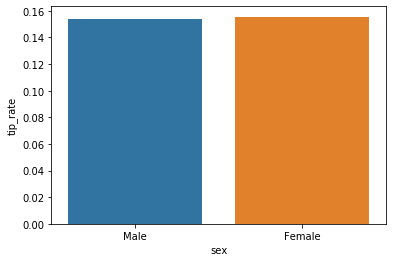

In [15]:
# diplot medians of each sex by barchart
sns.barplot(x='sex', 
            y='tip_rate', 
            data=df, 
            estimator=np.median, 
            ci=None)

# Mode（最頻値）

In [16]:
stats.mode([1, 2, 2, 2, 3, 3, 4])

ModeResult(mode=array([2]), count=array([3]))

In [17]:
mode, count = stats.mode([1, 2, 2, 2, 3, 3, 4])

In [18]:
print(mode, count)

[2] [3]


In [19]:
mode, count = stats.mode(df)

In [20]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [21]:
# if modes are two, there're two figures
# in above result, mode was only 0.1448225~, actually modes were two 0.144823 and 0.153846
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

In [22]:
df['tip_rate'].mode()

0    0.144823
1    0.153846
dtype: float64

# Range（範囲）

In [23]:
# most small value
np.min(df['tip'])

1.0

In [24]:
# most small value
df['tip'].min()

1.0

In [25]:
# each genders of most small values
df.groupby('sex').min()

,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [26]:
# most big value
np.max(df['tip'])

10.0

In [27]:
# most big value
df['tip'].max()

10.0

In [28]:
# each genders of most big value
df.groupby('sex').max()

,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [29]:
# range of tip
df['tip'].max() - df['tip'].min()

9.0

# Quartile（四分位数）

[![Image from Gyazo](https://i.gyazo.com/02756f300abf69f0cb5e288d7f72c113.png)](https://gyazo.com/02756f300abf69f0cb5e288d7f72c113)

In [30]:
# quartile 
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [31]:
# quartile
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [32]:
# IQR(四分位範囲：Q3（75%値）-Q1（25%値）)
stats.iqr(df['tip_rate'])

0.06234812458689154

In [33]:
# QD(四分位偏差：Q3（75%値）-Q1（25%値）/2)
stats.iqr(df['tip_rate']) / 2

0.03117406229344577

## Box plot

[![Image from Gyazo](https://i.gyazo.com/b125e39b3ff46921196de179d67f07ec.png)](https://gyazo.com/b125e39b3ff46921196de179d67f07ec)

#### 箱髭図が表しているもの

- 最小値(minimum)　データの中で最も小さな値　箱ひげ図における下髭の部分
- 第1四分位数(25th Percentile)  データを小さい順に並べた際の全体で25％に位置する値
- 中央値(median)　データにおいて真ん中の値　データの個数が偶数の時は、真ん中2つの平均の値
- 第3四分位数(75th Percentile)  データを小さい順に並べた際の全体で75％に位置する値
- 最大値(maximum)　データの中で最も大きな値 箱ひげ図における上髭の部分

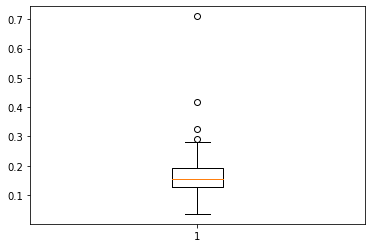

In [35]:
plt.boxplot(df['tip_rate'])
plt.show()

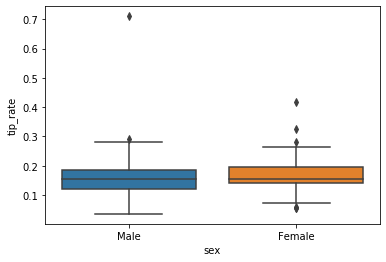

In [38]:
sns.boxplot(x='sex', y='tip_rate', data=df)

### ヒストグラムとの比較

[![Image from Gyazo](https://i.gyazo.com/8bf7eaaf31c83798b7fe0ed3bf45772e.png)](https://gyazo.com/8bf7eaaf31c83798b7fe0ed3bf45772e)

このように箱が狭く髭が長い図では、中央部分にデータが密集していることが掴めます。

[![Image from Gyazo](https://i.gyazo.com/a88e8594de9b60a5ad03eddd7b7c6fe3.png)](https://gyazo.com/a88e8594de9b60a5ad03eddd7b7c6fe3)

次に箱が広くヒゲが短い場合、中央にデータが密集している時と比べ、データが二極化している可能性が高いと言えます。

[![Image from Gyazo](https://i.gyazo.com/474f0757aafc14c2450d7eaca708ac76.png)](https://gyazo.com/474f0757aafc14c2450d7eaca708ac76)

また、箱に偏りがある場合、偏っている側にデータが密集しています。

### 外れ値

[![Image from Gyazo](https://i.gyazo.com/f82a829f1b8ed75dcb0d2f823ace3277.png)](https://gyazo.com/f82a829f1b8ed75dcb0d2f823ace3277)

外れ値とは、データの中で極端に他の値からかけ離れている値のことを指します。通常、外れ値の値は大きすぎても小さすぎても最大・最小値として表さず、箱ひげ図の外に表します。外れ値を最大値または最小値とみなしてしまうと、ヒゲの長さが異常に長くなり、本来得たいデータのばらつきを適切に把握できなくなるためです。

**外れ値とみなされる値**

- 「第3四分位数＋四分位範囲×1.5」以上のデータ

- 「第1四分位数－四分位範囲×1.5」以下のデータ

四分位範囲を利用した外れ値の検出方法では、上記に当てはまるような明らかに他の数とかけ離れている値を外れ値とみなし、データセットから取り除くことができます。

# MD（平均偏差：mean deviation）
absolute value of each value minus mean or average

$\frac{1}{n}\sum_{i=1}^n |x_i -\bar{x}|$

平均偏差とは、散らばりを表す指標のひとつで、それぞれのデータの偏差の絶対値からデータ個数で割って算出される偏差の平均値です。

**単純に加算すると0になるため、絶対値を加算するところがポイントです。**

誤差を最小にする計算などで微分が大活躍しますが、絶対値ではそれが使えないため、計算には不向きです。

その為誤差を二乗したのが**分散**です。

# Variance（分散）
MD squared equals variance

${\frac{1}{n}\sum_{i=1}^n (x_i -\bar{x})^2}$

偏差を絶対値ではなく、2乗することで偏差の平均を求めたものを**分散**といいます。

平均偏差の式と比較してみるとわかると思いますが、2乗するか絶対値にするかの違いです。

分散は2乗するため、値は大きくなってしまいます。

その為これの平方根をとり、元の尺度に戻そうというアイデアが**標準偏差**です。

In [40]:
np.var([1, 2, 3, 4])

1.25

In [41]:
np.var(df['tip_rate'])

0.0037145280013546928

# Standard deviation（標準偏差）
→ Root of variance equals standard deviation

$\sqrt{\frac{1}{n}\sum_{i=1}^n (x_i -\bar{x})^2}$

具体的にいうと、

平均±標準偏差→全データの2/3がこの範囲にある

平均±２標準偏差→全データの95%がこの範囲にある

平均±３標準偏差→全データの99~100%がこの範囲にある

In [42]:
np.std(df['tip_rate'])

0.060946927743362855